In [ ]:
$from google.colab import files
air_file = files.upload()

Saving Air Quality Data.csv to Air Quality Data.csv


In [ ]:
cancer_file = files.upload()

Saving data_194228.csv to data_194228.csv


In [ ]:
import pandas as pd
cancer_df = pd.read_csv('data_194228.csv')
air_df = pd.read_csv('Air Quality Data.csv')

# Clean and rename for clarity
cancer_df = cancer_df.rename(columns={'Value': 'CancerRate'})
air_df = air_df.rename(columns={'Value': 'PollutantLevel'})

# Drop unused columns
cancer_df = cancer_df.drop(columns=['Data Comment', 'Unnamed: 10'], errors='ignore')
air_df = air_df.drop(columns=['Data Comment', 'Unnamed: 7'], errors='ignore')

print(cancer_df.columns)
print(air_df.columns)

Index(['StateFIPS', 'State', 'CountyFIPS', 'County', 'Year', 'CancerRate',
       '95% Confidence Interval', 'Confidence Interval Low',
       'Confidence Interval High'],
      dtype='object')
Index(['StateFIPS', 'State', 'CountyFIPS', 'County', 'Year', 'PollutantLevel',
       'Pollutant'],
      dtype='object')


In [ ]:
air_df.head()

,StateFIPS,State,CountyFIPS,County,Year,PollutantLevel,Pollutant
0,45,South Carolina,45001,Abbeville,2018,0.17,Pollutant: Benzene
1,45,South Carolina,45001,Abbeville,2018,1.56,Pollutant: Formaldehyde
2,45,South Carolina,45001,Abbeville,2018,1.30,Pollutant: Acetaldehyde
3,45,South Carolina,45001,Abbeville,2018,0.37,Pollutant: Carbon tetrachloride
4,45,South Carolina,45001,Abbeville,2018,0.01,"Pollutant: 1,3-butadiene"


In [ ]:
print(cancer_df)

    StateFIPS           State  CountyFIPS        County  Year CancerRate  \
0          45  South Carolina       45001     Abbeville  2018       6.3%   
1          45  South Carolina       45001     Abbeville  2019       6.4%   
2          45  South Carolina       45003         Aiken  2018       6.4%   
3          45  South Carolina       45003         Aiken  2019       6.5%   
4          45  South Carolina       45005     Allendale  2018       5.9%   
..        ...             ...         ...           ...   ...        ...   
87         45  South Carolina       45087         Union  2019       6.4%   
88         45  South Carolina       45089  Williamsburg  2018       6.0%   
89         45  South Carolina       45089  Williamsburg  2019       5.9%   
90         45  South Carolina       45091          York  2018       6.4%   
91         45  South Carolina       45091          York  2019       6.4%   

   95% Confidence Interval Confidence Interval Low Confidence Interval High  
0        

In [ ]:
# Merge the two dataframes
merged_df = pd.merge(
    cancer_df,
    air_df,
    on=['State', 'County', 'Year'],
    how='inner'
)

# Ensure CancerRate is initially treated as a string if necessary
merged_df['CancerRate'] = merged_df['CancerRate'].astype(str)

# Check if there's a '%' in the CancerRate column and only convert those rows
if merged_df['CancerRate'].str.contains('%').any():  # Check if any rows contain '%'
    merged_df['CancerRate'] = (
        merged_df['CancerRate']
        .str.replace('%', '', regex=False)  # Remove the '%' symbol
        .astype(float) / 100                # Convert to float and divide by 100
    )

# Now check if the values are correctly converted into decimals
print(merged_df[['CancerRate']].head())

   CancerRate
0       0.063
1       0.063
2       0.063
3       0.063
4       0.063


In [ ]:
print(merged_df.columns)

Index(['StateFIPS_x', 'State', 'CountyFIPS_x', 'County', 'Year', 'CancerRate',
       '95% Confidence Interval', 'Confidence Interval Low',
       'Confidence Interval High', 'StateFIPS_y', 'CountyFIPS_y',
       'PollutantLevel', 'Pollutant'],
      dtype='object')


In [ ]:
print(merged_df.head(10))

   StateFIPS_x           State  CountyFIPS_x     County  Year  CancerRate  \
0           45  South Carolina         45001  Abbeville  2018       0.063   
1           45  South Carolina         45001  Abbeville  2018       0.063   
2           45  South Carolina         45001  Abbeville  2018       0.063   
3           45  South Carolina         45001  Abbeville  2018       0.063   
4           45  South Carolina         45001  Abbeville  2018       0.063   
5           45  South Carolina         45001  Abbeville  2018       0.063   
6           45  South Carolina         45001  Abbeville  2018       0.063   
7           45  South Carolina         45001  Abbeville  2018       0.063   
8           45  South Carolina         45001  Abbeville  2019       0.064   
9           45  South Carolina         45001  Abbeville  2019       0.064   

  95% Confidence Interval Confidence Interval Low Confidence Interval High  \
0           (6.1% - 6.6%)                    6.1%                     6.6%


Logistic Regression
Accuracy: 0.3076923076923077
Confusion Matrix:
 [[ 12   4]
 [149  56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.07      0.75      0.14        16
           1       0.93      0.27      0.42       205

    accuracy                           0.31       221
   macro avg       0.50      0.51      0.28       221
weighted avg       0.87      0.31      0.40       221

KNN Report: 
 0.9140271493212669


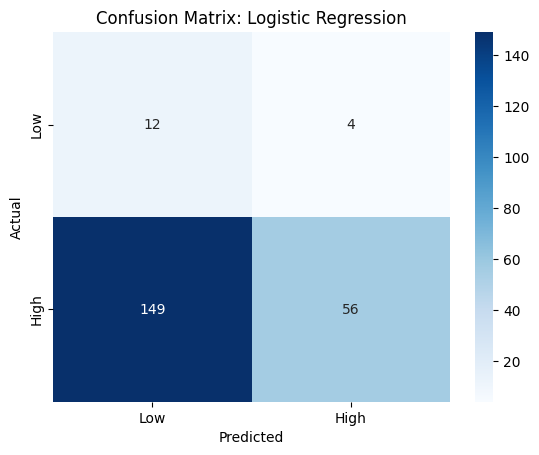


Decision Tree
Accuracy: 0.9095022624434389
Confusion Matrix:
 [[  0  16]
 [  4 201]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.93      0.98      0.95       205

    accuracy                           0.91       221
   macro avg       0.46      0.49      0.48       221
weighted avg       0.86      0.91      0.88       221

KNN Report: 
 0.9140271493212669


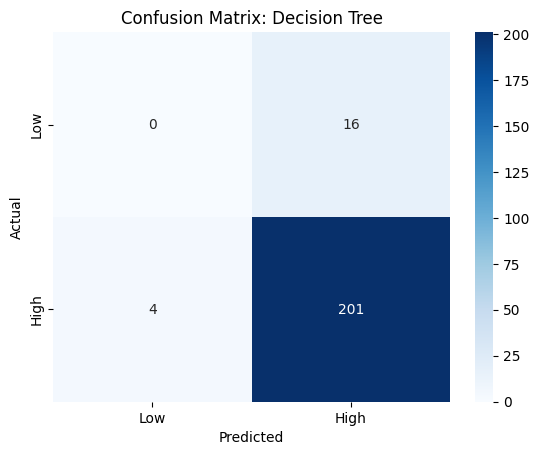


Random Forest
Accuracy: 0.9095022624434389
Confusion Matrix:
 [[  0  16]
 [  4 201]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.93      0.98      0.95       205

    accuracy                           0.91       221
   macro avg       0.46      0.49      0.48       221
weighted avg       0.86      0.91      0.88       221

KNN Report: 
 0.9140271493212669


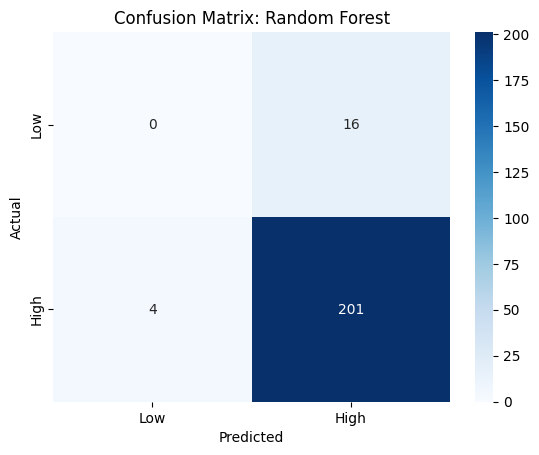


KNN
Accuracy: 0.9140271493212669
Confusion Matrix:
 [[  0  16]
 [  3 202]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.93      0.99      0.96       205

    accuracy                           0.91       221
   macro avg       0.46      0.49      0.48       221
weighted avg       0.86      0.91      0.89       221

KNN Report: 
 0.9140271493212669


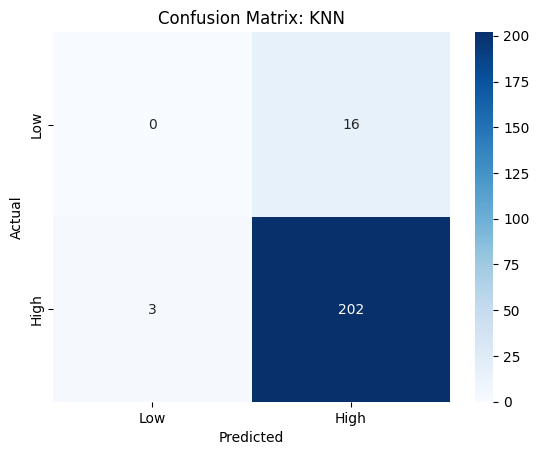


SVM
Accuracy: 0.6470588235294118
Confusion Matrix:
 [[  3  13]
 [ 65 140]]
Classification Report:
               precision    recall  f1-score   support

           0       0.04      0.19      0.07        16
           1       0.92      0.68      0.78       205

    accuracy                           0.65       221
   macro avg       0.48      0.44      0.43       221
weighted avg       0.85      0.65      0.73       221

KNN Report: 
 0.9140271493212669


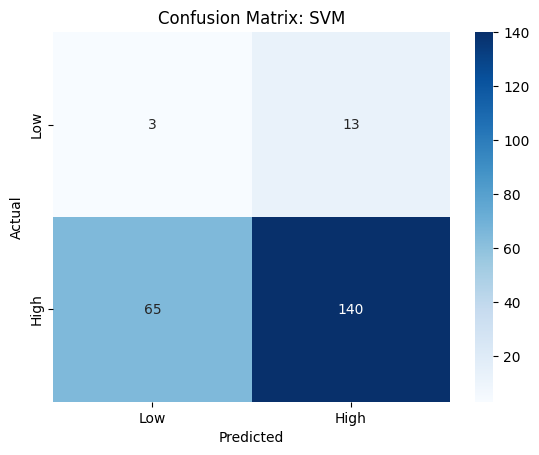

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Classify CancerRate into "High" and "Low"
threshold = 6 / 100
merged_df['CancerRateClass'] = merged_df['CancerRate'].apply(lambda x: 1 if x > threshold else 0)

# Step 2: Features and target
X = merged_df[['PollutantLevel']]
y = merged_df['CancerRateClass']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN" : KNeighborsClassifier(),
    "SVM": SVC(class_weight='balanced')  # For imbalance
}

# Step 5: Train and evaluate each
for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("KNN Report: \n", KNeighborsClassifier().fit(X_train, y_train).score(X_test, y_test))

    # Confusion Matrix Plot
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Low', 'High'],
                yticklabels=['Low', 'High'])
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


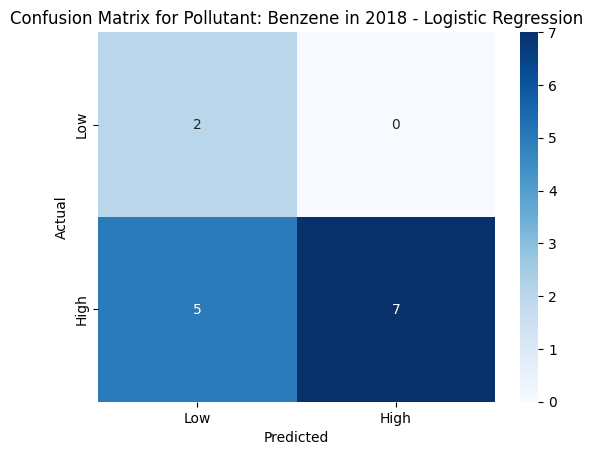


Classification Report for Pollutant: Benzene in 2018 - Logistic Regression:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.29      1.00      0.44         2
High Cancer Rate       1.00      0.58      0.74        12

        accuracy                           0.64        14
       macro avg       0.64      0.79      0.59        14
    weighted avg       0.90      0.64      0.70        14



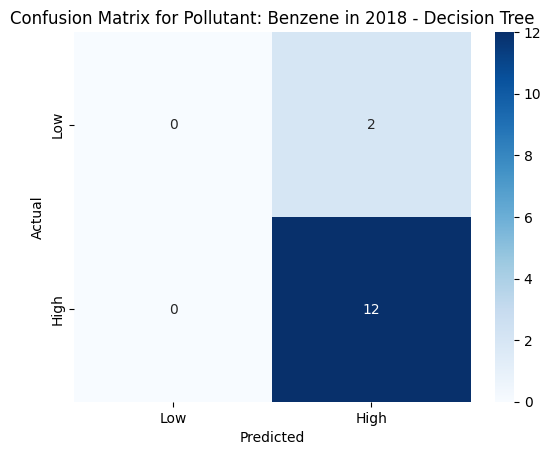


Classification Report for Pollutant: Benzene in 2018 - Decision Tree:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.00      0.00      0.00         2
High Cancer Rate       0.86      1.00      0.92        12

        accuracy                           0.86        14
       macro avg       0.43      0.50      0.46        14
    weighted avg       0.73      0.86      0.79        14



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


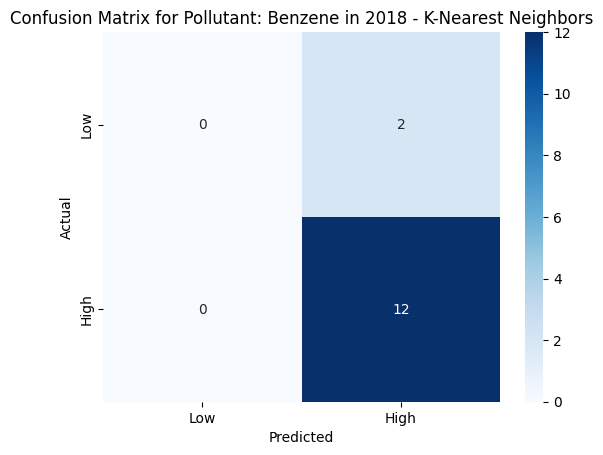


Classification Report for Pollutant: Benzene in 2018 - K-Nearest Neighbors:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.00      0.00      0.00         2
High Cancer Rate       0.86      1.00      0.92        12

        accuracy                           0.86        14
       macro avg       0.43      0.50      0.46        14
    weighted avg       0.73      0.86      0.79        14



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


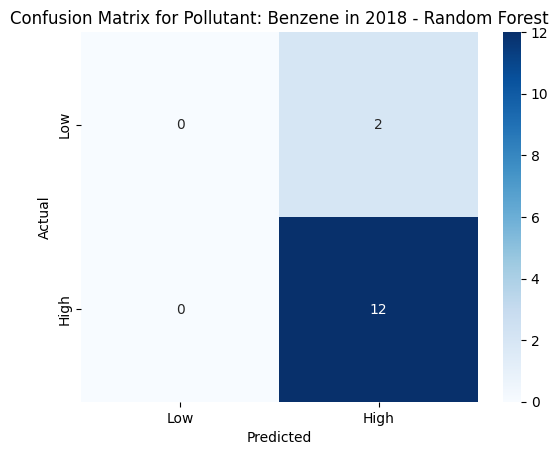


Classification Report for Pollutant: Benzene in 2018 - Random Forest:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.00      0.00      0.00         2
High Cancer Rate       0.86      1.00      0.92        12

        accuracy                           0.86        14
       macro avg       0.43      0.50      0.46        14
    weighted avg       0.73      0.86      0.79        14



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


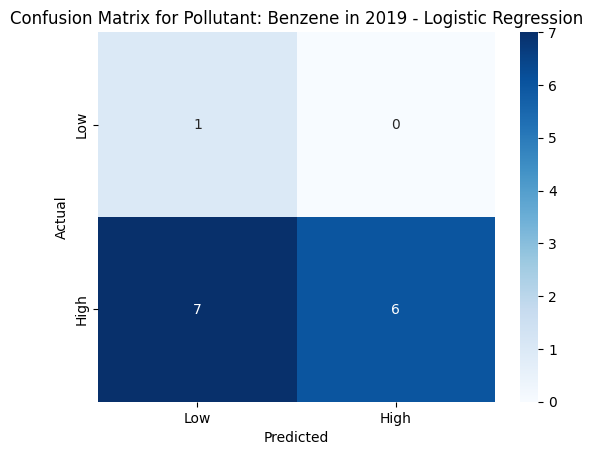


Classification Report for Pollutant: Benzene in 2019 - Logistic Regression:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.12      1.00      0.22         1
High Cancer Rate       1.00      0.46      0.63        13

        accuracy                           0.50        14
       macro avg       0.56      0.73      0.43        14
    weighted avg       0.94      0.50      0.60        14



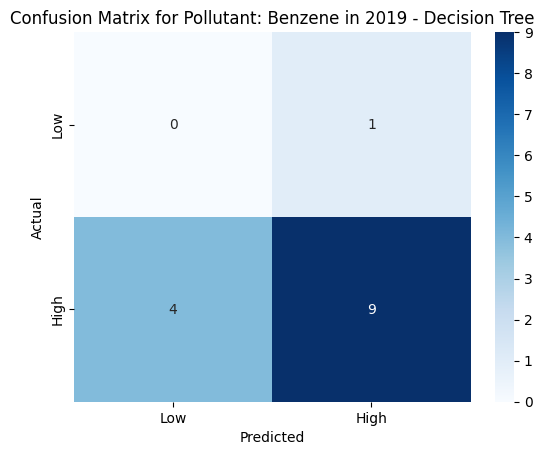


Classification Report for Pollutant: Benzene in 2019 - Decision Tree:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.00      0.00      0.00         1
High Cancer Rate       0.90      0.69      0.78        13

        accuracy                           0.64        14
       macro avg       0.45      0.35      0.39        14
    weighted avg       0.84      0.64      0.73        14



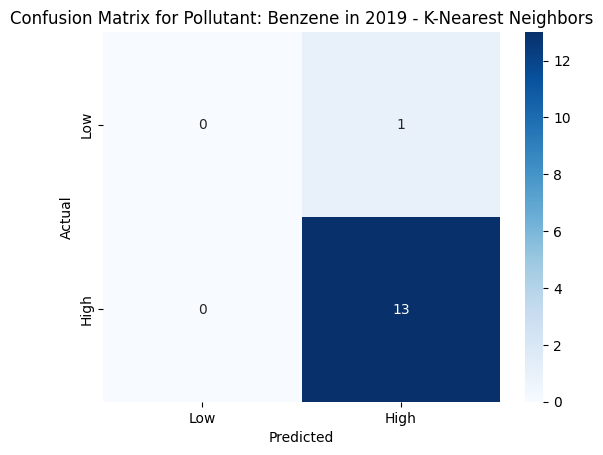


Classification Report for Pollutant: Benzene in 2019 - K-Nearest Neighbors:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.00      0.00      0.00         1
High Cancer Rate       0.93      1.00      0.96        13

        accuracy                           0.93        14
       macro avg       0.46      0.50      0.48        14
    weighted avg       0.86      0.93      0.89        14



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


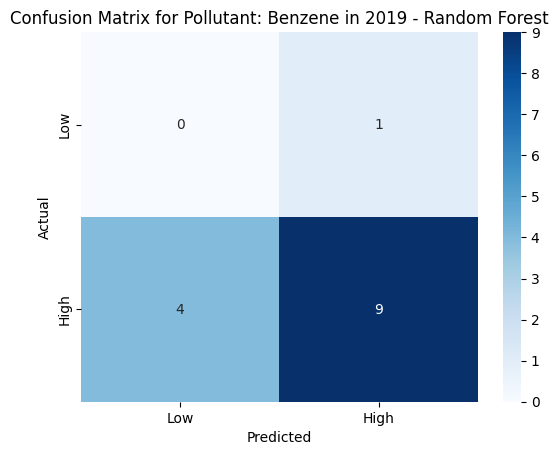


Classification Report for Pollutant: Benzene in 2019 - Random Forest:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.00      0.00      0.00         1
High Cancer Rate       0.90      0.69      0.78        13

        accuracy                           0.64        14
       macro avg       0.45      0.35      0.39        14
    weighted avg       0.84      0.64      0.73        14



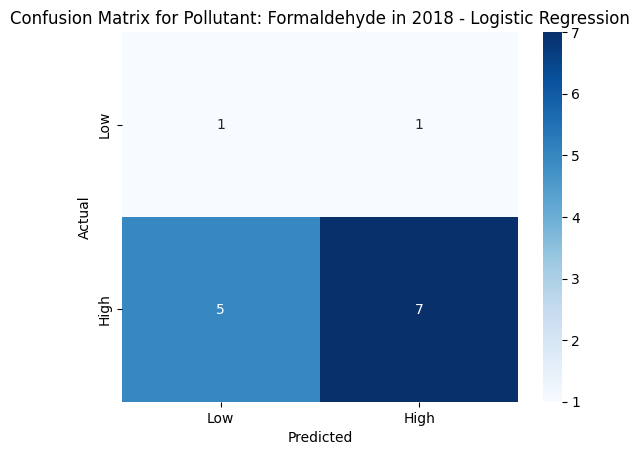


Classification Report for Pollutant: Formaldehyde in 2018 - Logistic Regression:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.17      0.50      0.25         2
High Cancer Rate       0.88      0.58      0.70        12

        accuracy                           0.57        14
       macro avg       0.52      0.54      0.47        14
    weighted avg       0.77      0.57      0.64        14



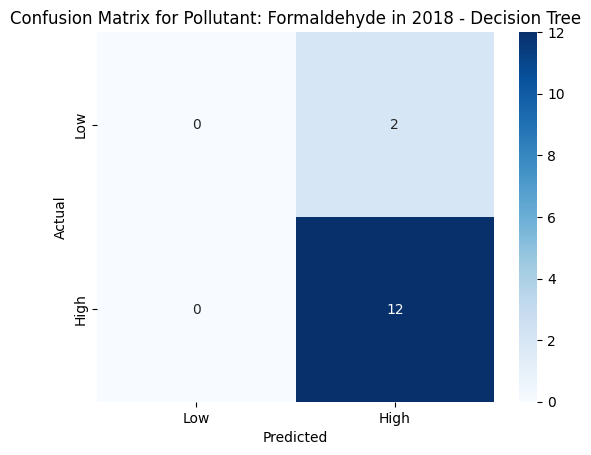


Classification Report for Pollutant: Formaldehyde in 2018 - Decision Tree:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.00      0.00      0.00         2
High Cancer Rate       0.86      1.00      0.92        12

        accuracy                           0.86        14
       macro avg       0.43      0.50      0.46        14
    weighted avg       0.73      0.86      0.79        14



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


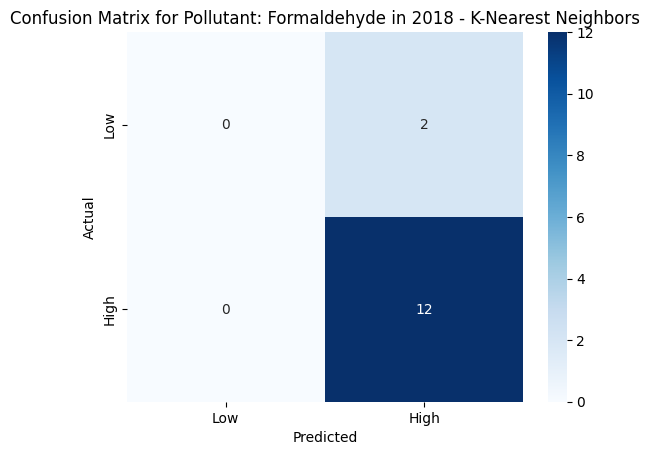


Classification Report for Pollutant: Formaldehyde in 2018 - K-Nearest Neighbors:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.00      0.00      0.00         2
High Cancer Rate       0.86      1.00      0.92        12

        accuracy                           0.86        14
       macro avg       0.43      0.50      0.46        14
    weighted avg       0.73      0.86      0.79        14



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


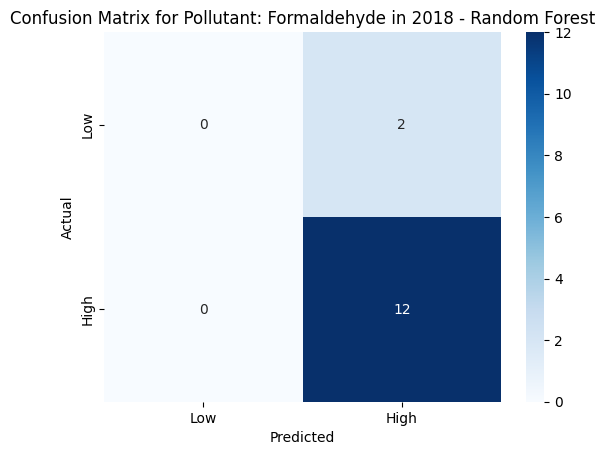


Classification Report for Pollutant: Formaldehyde in 2018 - Random Forest:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.00      0.00      0.00         2
High Cancer Rate       0.86      1.00      0.92        12

        accuracy                           0.86        14
       macro avg       0.43      0.50      0.46        14
    weighted avg       0.73      0.86      0.79        14



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


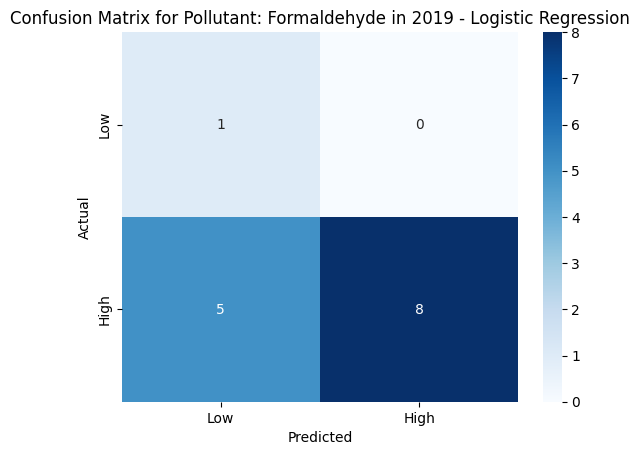


Classification Report for Pollutant: Formaldehyde in 2019 - Logistic Regression:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.17      1.00      0.29         1
High Cancer Rate       1.00      0.62      0.76        13

        accuracy                           0.64        14
       macro avg       0.58      0.81      0.52        14
    weighted avg       0.94      0.64      0.73        14



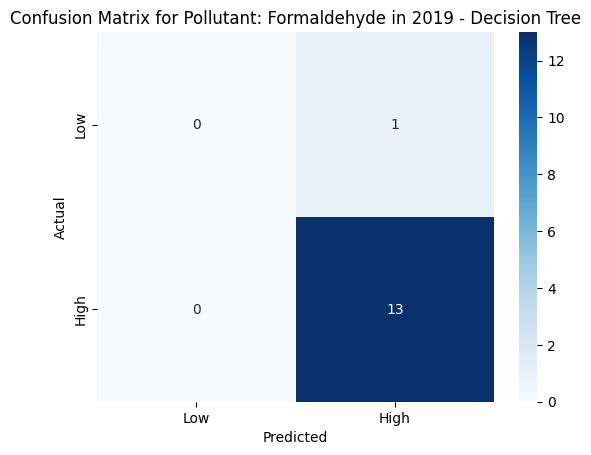


Classification Report for Pollutant: Formaldehyde in 2019 - Decision Tree:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.00      0.00      0.00         1
High Cancer Rate       0.93      1.00      0.96        13

        accuracy                           0.93        14
       macro avg       0.46      0.50      0.48        14
    weighted avg       0.86      0.93      0.89        14



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


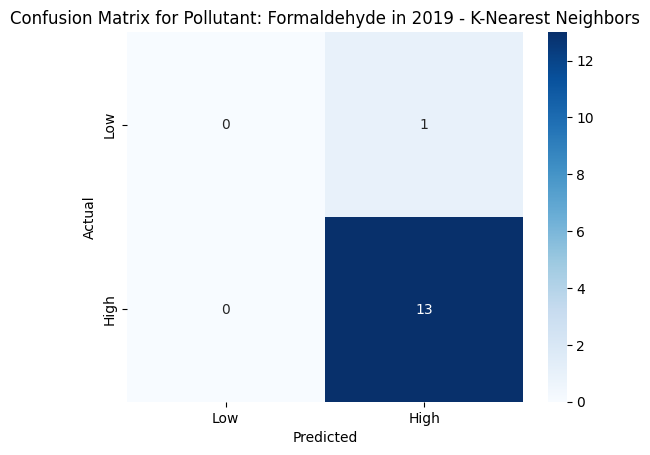


Classification Report for Pollutant: Formaldehyde in 2019 - K-Nearest Neighbors:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.00      0.00      0.00         1
High Cancer Rate       0.93      1.00      0.96        13

        accuracy                           0.93        14
       macro avg       0.46      0.50      0.48        14
    weighted avg       0.86      0.93      0.89        14



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


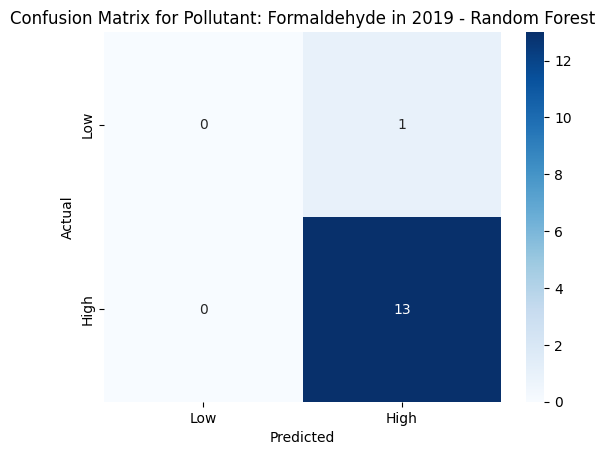


Classification Report for Pollutant: Formaldehyde in 2019 - Random Forest:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.00      0.00      0.00         1
High Cancer Rate       0.93      1.00      0.96        13

        accuracy                           0.93        14
       macro avg       0.46      0.50      0.48        14
    weighted avg       0.86      0.93      0.89        14



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


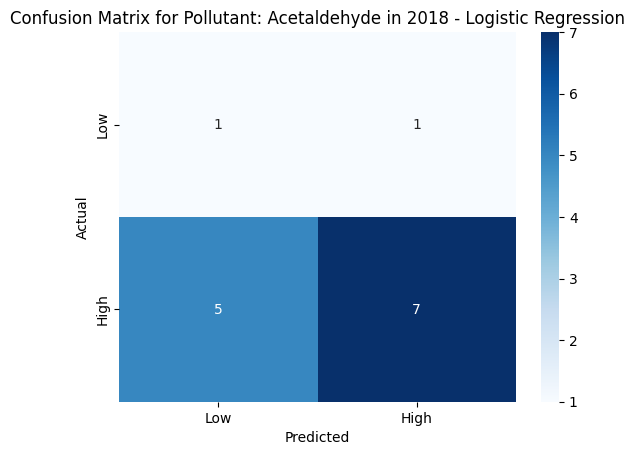


Classification Report for Pollutant: Acetaldehyde in 2018 - Logistic Regression:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.17      0.50      0.25         2
High Cancer Rate       0.88      0.58      0.70        12

        accuracy                           0.57        14
       macro avg       0.52      0.54      0.47        14
    weighted avg       0.77      0.57      0.64        14



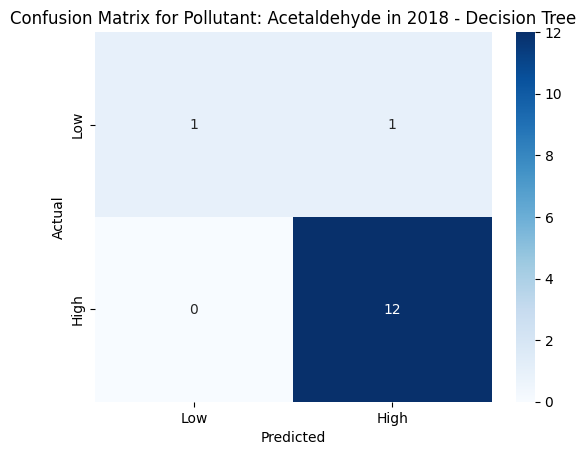


Classification Report for Pollutant: Acetaldehyde in 2018 - Decision Tree:
                  precision    recall  f1-score   support

 Low Cancer Rate       1.00      0.50      0.67         2
High Cancer Rate       0.92      1.00      0.96        12

        accuracy                           0.93        14
       macro avg       0.96      0.75      0.81        14
    weighted avg       0.93      0.93      0.92        14



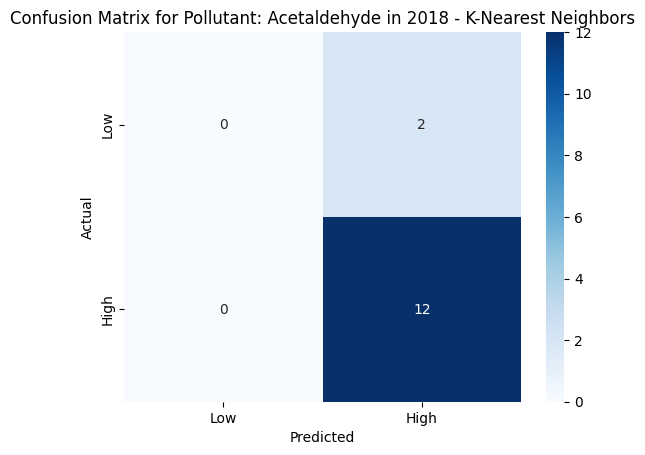


Classification Report for Pollutant: Acetaldehyde in 2018 - K-Nearest Neighbors:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.00      0.00      0.00         2
High Cancer Rate       0.86      1.00      0.92        12

        accuracy                           0.86        14
       macro avg       0.43      0.50      0.46        14
    weighted avg       0.73      0.86      0.79        14



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


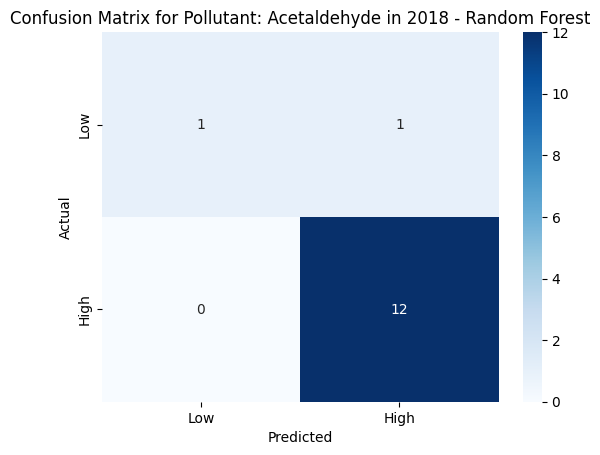


Classification Report for Pollutant: Acetaldehyde in 2018 - Random Forest:
                  precision    recall  f1-score   support

 Low Cancer Rate       1.00      0.50      0.67         2
High Cancer Rate       0.92      1.00      0.96        12

        accuracy                           0.93        14
       macro avg       0.96      0.75      0.81        14
    weighted avg       0.93      0.93      0.92        14



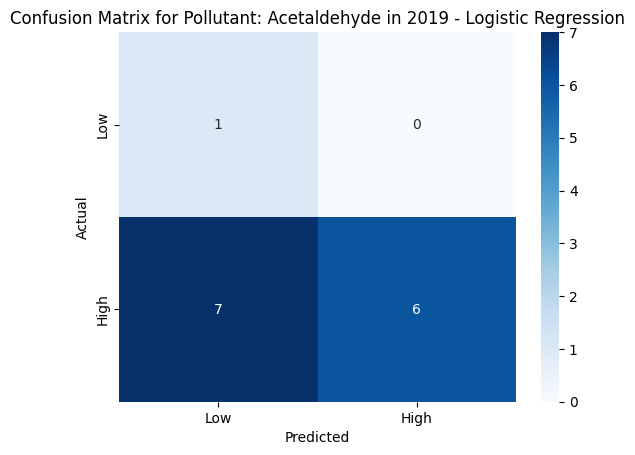


Classification Report for Pollutant: Acetaldehyde in 2019 - Logistic Regression:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.12      1.00      0.22         1
High Cancer Rate       1.00      0.46      0.63        13

        accuracy                           0.50        14
       macro avg       0.56      0.73      0.43        14
    weighted avg       0.94      0.50      0.60        14



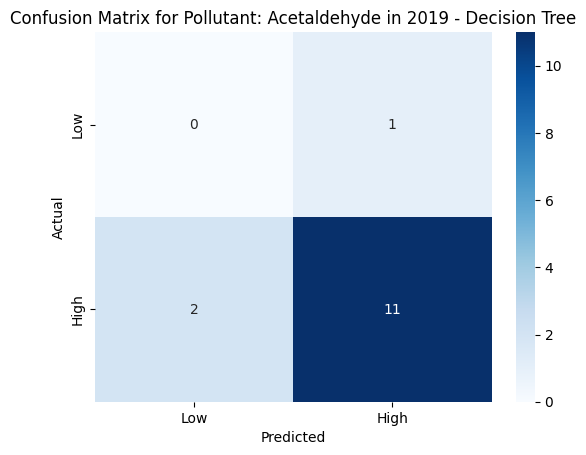


Classification Report for Pollutant: Acetaldehyde in 2019 - Decision Tree:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.00      0.00      0.00         1
High Cancer Rate       0.92      0.85      0.88        13

        accuracy                           0.79        14
       macro avg       0.46      0.42      0.44        14
    weighted avg       0.85      0.79      0.82        14



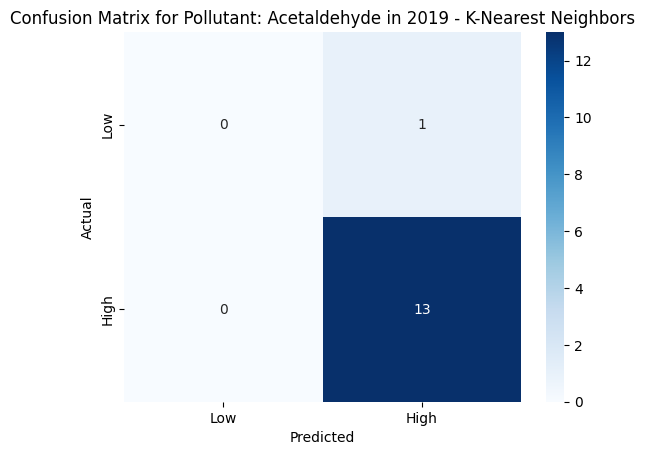


Classification Report for Pollutant: Acetaldehyde in 2019 - K-Nearest Neighbors:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.00      0.00      0.00         1
High Cancer Rate       0.93      1.00      0.96        13

        accuracy                           0.93        14
       macro avg       0.46      0.50      0.48        14
    weighted avg       0.86      0.93      0.89        14



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


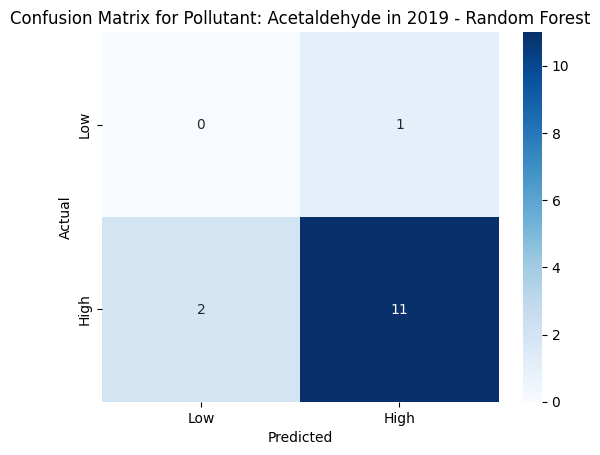


Classification Report for Pollutant: Acetaldehyde in 2019 - Random Forest:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.00      0.00      0.00         1
High Cancer Rate       0.92      0.85      0.88        13

        accuracy                           0.79        14
       macro avg       0.46      0.42      0.44        14
    weighted avg       0.85      0.79      0.82        14



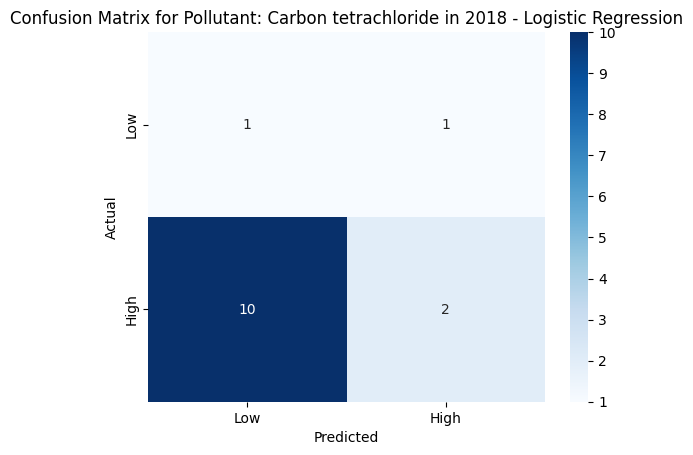


Classification Report for Pollutant: Carbon tetrachloride in 2018 - Logistic Regression:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.09      0.50      0.15         2
High Cancer Rate       0.67      0.17      0.27        12

        accuracy                           0.21        14
       macro avg       0.38      0.33      0.21        14
    weighted avg       0.58      0.21      0.25        14



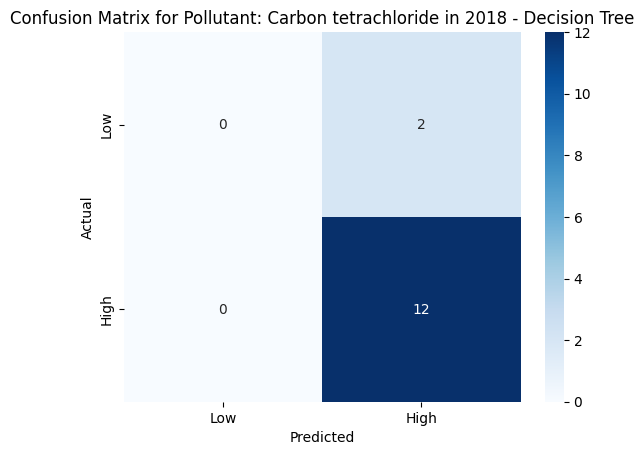


Classification Report for Pollutant: Carbon tetrachloride in 2018 - Decision Tree:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.00      0.00      0.00         2
High Cancer Rate       0.86      1.00      0.92        12

        accuracy                           0.86        14
       macro avg       0.43      0.50      0.46        14
    weighted avg       0.73      0.86      0.79        14



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


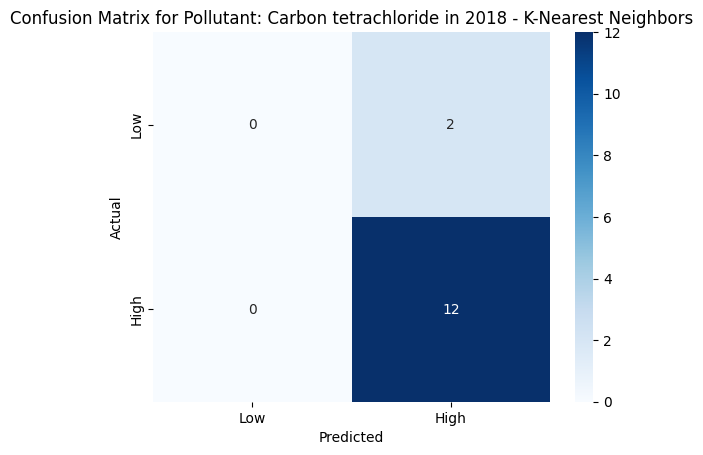


Classification Report for Pollutant: Carbon tetrachloride in 2018 - K-Nearest Neighbors:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.00      0.00      0.00         2
High Cancer Rate       0.86      1.00      0.92        12

        accuracy                           0.86        14
       macro avg       0.43      0.50      0.46        14
    weighted avg       0.73      0.86      0.79        14



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


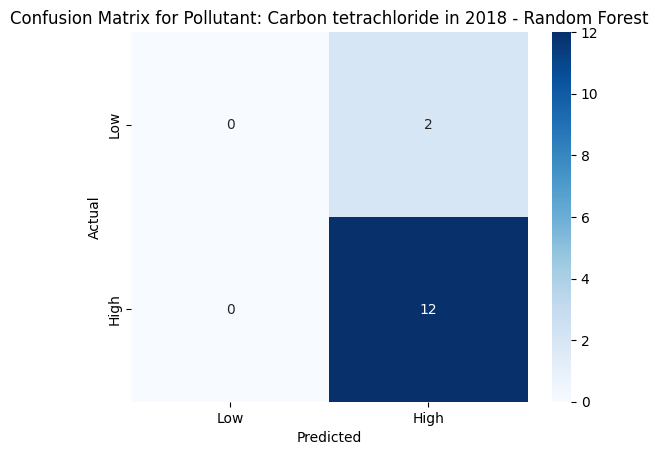


Classification Report for Pollutant: Carbon tetrachloride in 2018 - Random Forest:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.00      0.00      0.00         2
High Cancer Rate       0.86      1.00      0.92        12

        accuracy                           0.86        14
       macro avg       0.43      0.50      0.46        14
    weighted avg       0.73      0.86      0.79        14



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


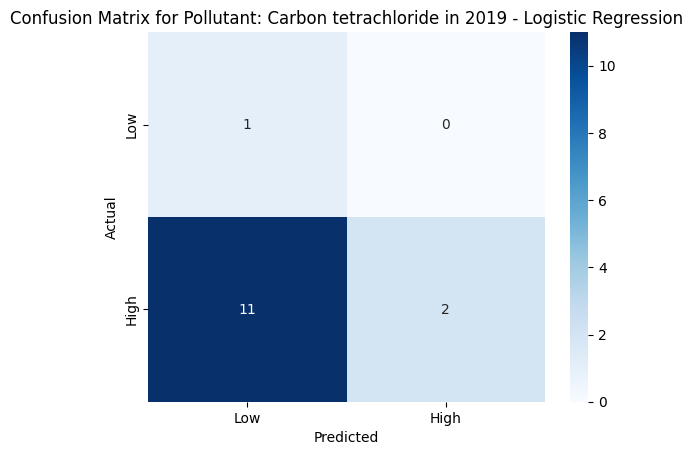


Classification Report for Pollutant: Carbon tetrachloride in 2019 - Logistic Regression:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.08      1.00      0.15         1
High Cancer Rate       1.00      0.15      0.27        13

        accuracy                           0.21        14
       macro avg       0.54      0.58      0.21        14
    weighted avg       0.93      0.21      0.26        14



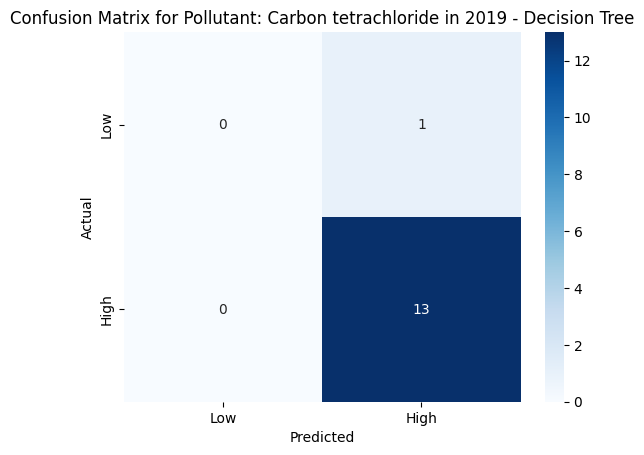


Classification Report for Pollutant: Carbon tetrachloride in 2019 - Decision Tree:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.00      0.00      0.00         1
High Cancer Rate       0.93      1.00      0.96        13

        accuracy                           0.93        14
       macro avg       0.46      0.50      0.48        14
    weighted avg       0.86      0.93      0.89        14



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


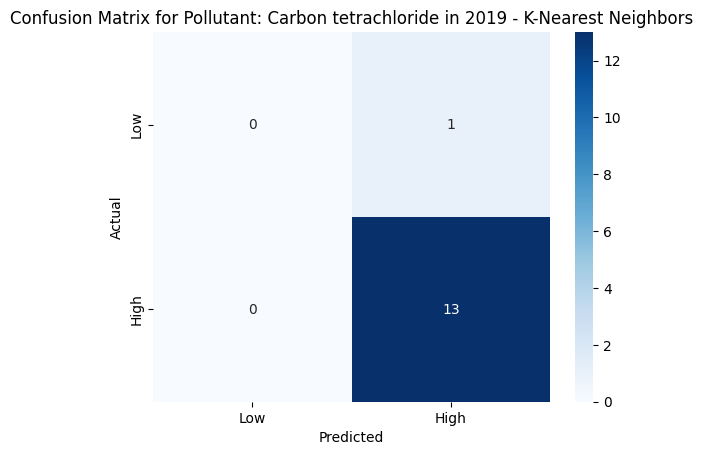


Classification Report for Pollutant: Carbon tetrachloride in 2019 - K-Nearest Neighbors:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.00      0.00      0.00         1
High Cancer Rate       0.93      1.00      0.96        13

        accuracy                           0.93        14
       macro avg       0.46      0.50      0.48        14
    weighted avg       0.86      0.93      0.89        14



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


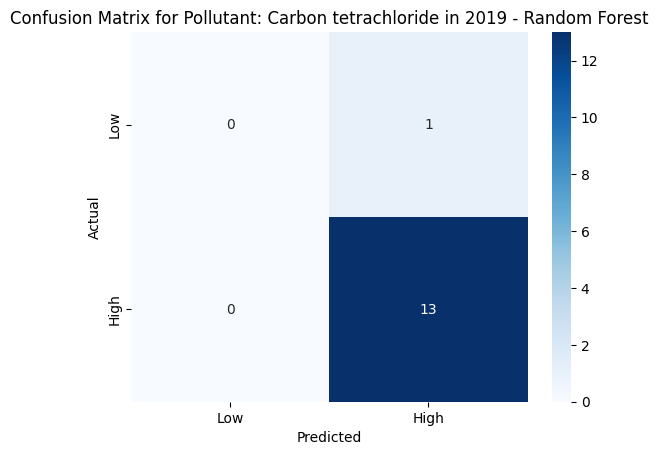


Classification Report for Pollutant: Carbon tetrachloride in 2019 - Random Forest:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.00      0.00      0.00         1
High Cancer Rate       0.93      1.00      0.96        13

        accuracy                           0.93        14
       macro avg       0.46      0.50      0.48        14
    weighted avg       0.86      0.93      0.89        14



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


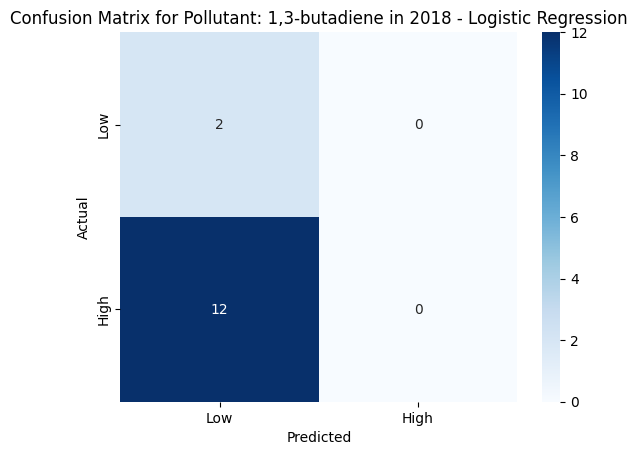


Classification Report for Pollutant: 1,3-butadiene in 2018 - Logistic Regression:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.14      1.00      0.25         2
High Cancer Rate       0.00      0.00      0.00        12

        accuracy                           0.14        14
       macro avg       0.07      0.50      0.12        14
    weighted avg       0.02      0.14      0.04        14



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


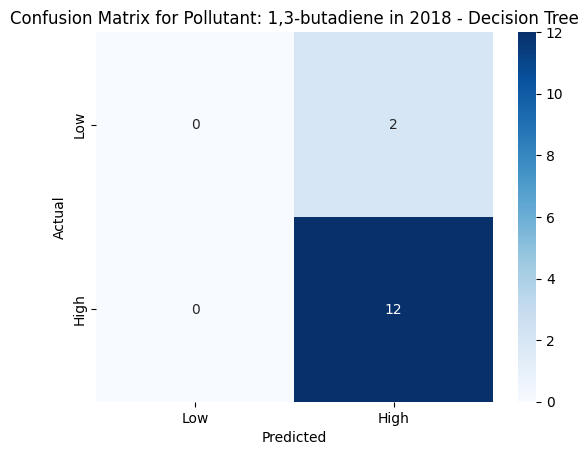

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report for Pollutant: 1,3-butadiene in 2018 - Decision Tree:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.00      0.00      0.00         2
High Cancer Rate       0.86      1.00      0.92        12

        accuracy                           0.86        14
       macro avg       0.43      0.50      0.46        14
    weighted avg       0.73      0.86      0.79        14



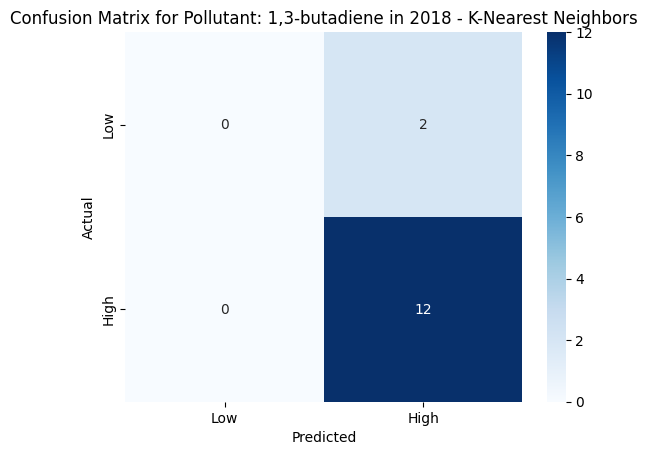


Classification Report for Pollutant: 1,3-butadiene in 2018 - K-Nearest Neighbors:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.00      0.00      0.00         2
High Cancer Rate       0.86      1.00      0.92        12

        accuracy                           0.86        14
       macro avg       0.43      0.50      0.46        14
    weighted avg       0.73      0.86      0.79        14



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


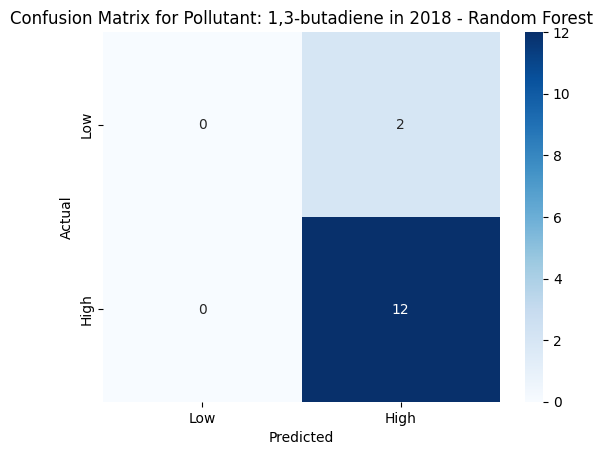


Classification Report for Pollutant: 1,3-butadiene in 2018 - Random Forest:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.00      0.00      0.00         2
High Cancer Rate       0.86      1.00      0.92        12

        accuracy                           0.86        14
       macro avg       0.43      0.50      0.46        14
    weighted avg       0.73      0.86      0.79        14



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


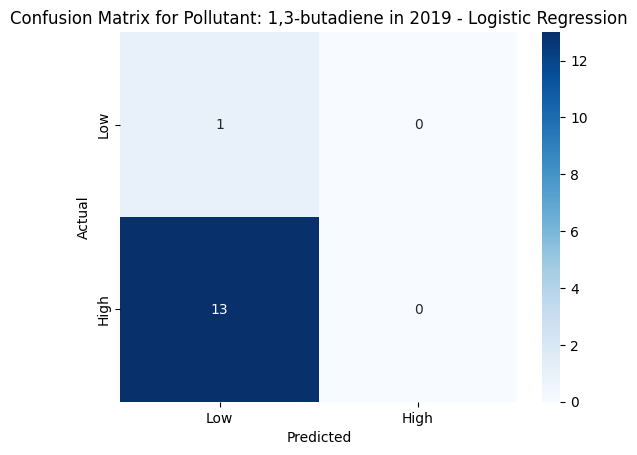


Classification Report for Pollutant: 1,3-butadiene in 2019 - Logistic Regression:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.07      1.00      0.13         1
High Cancer Rate       0.00      0.00      0.00        13

        accuracy                           0.07        14
       macro avg       0.04      0.50      0.07        14
    weighted avg       0.01      0.07      0.01        14



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


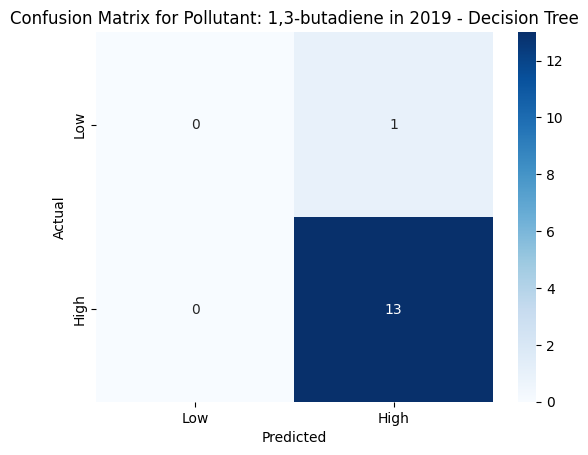


Classification Report for Pollutant: 1,3-butadiene in 2019 - Decision Tree:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.00      0.00      0.00         1
High Cancer Rate       0.93      1.00      0.96        13

        accuracy                           0.93        14
       macro avg       0.46      0.50      0.48        14
    weighted avg       0.86      0.93      0.89        14



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


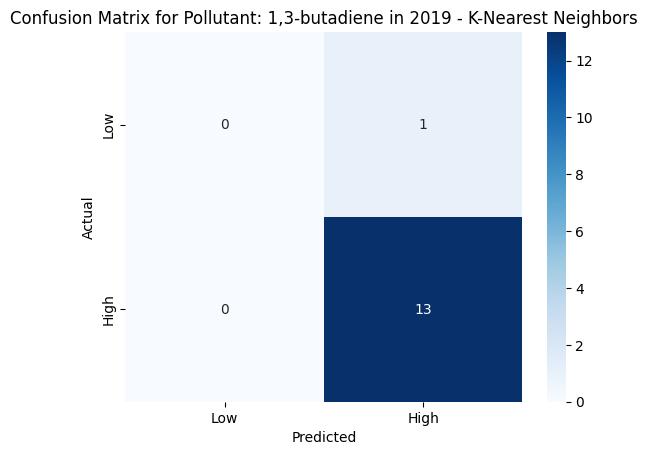


Classification Report for Pollutant: 1,3-butadiene in 2019 - K-Nearest Neighbors:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.00      0.00      0.00         1
High Cancer Rate       0.93      1.00      0.96        13

        accuracy                           0.93        14
       macro avg       0.46      0.50      0.48        14
    weighted avg       0.86      0.93      0.89        14



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


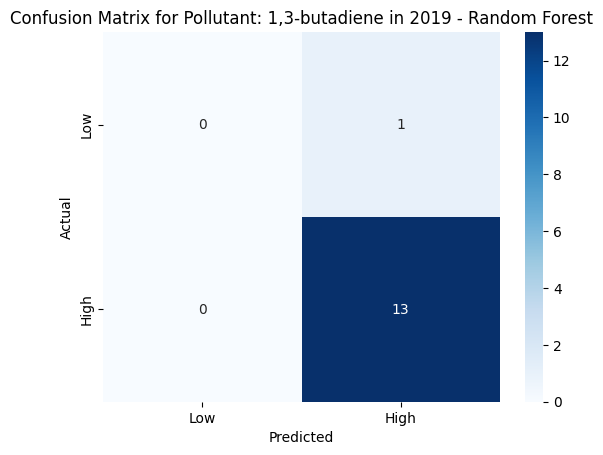


Classification Report for Pollutant: 1,3-butadiene in 2019 - Random Forest:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.00      0.00      0.00         1
High Cancer Rate       0.93      1.00      0.96        13

        accuracy                           0.93        14
       macro avg       0.46      0.50      0.48        14
    weighted avg       0.86      0.93      0.89        14



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


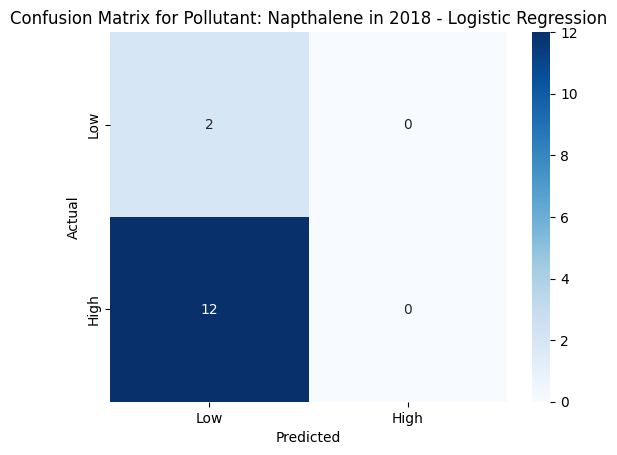


Classification Report for Pollutant: Napthalene in 2018 - Logistic Regression:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.14      1.00      0.25         2
High Cancer Rate       0.00      0.00      0.00        12

        accuracy                           0.14        14
       macro avg       0.07      0.50      0.12        14
    weighted avg       0.02      0.14      0.04        14



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


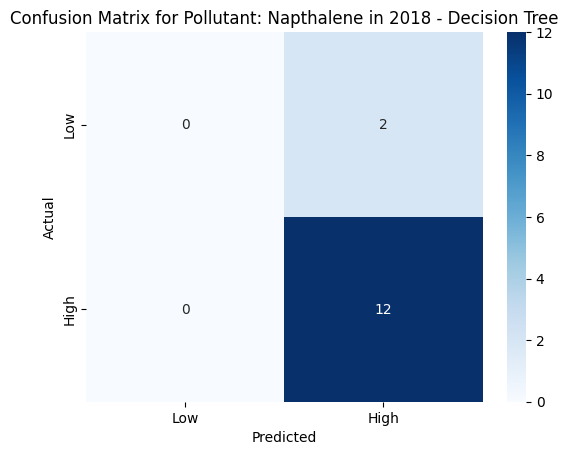


Classification Report for Pollutant: Napthalene in 2018 - Decision Tree:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.00      0.00      0.00         2
High Cancer Rate       0.86      1.00      0.92        12

        accuracy                           0.86        14
       macro avg       0.43      0.50      0.46        14
    weighted avg       0.73      0.86      0.79        14



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


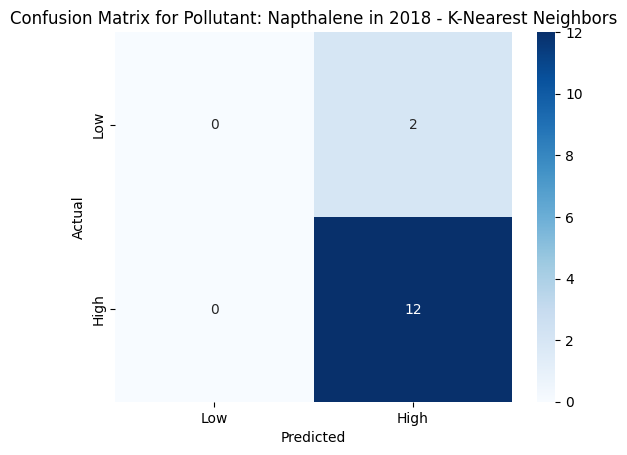


Classification Report for Pollutant: Napthalene in 2018 - K-Nearest Neighbors:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.00      0.00      0.00         2
High Cancer Rate       0.86      1.00      0.92        12

        accuracy                           0.86        14
       macro avg       0.43      0.50      0.46        14
    weighted avg       0.73      0.86      0.79        14



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


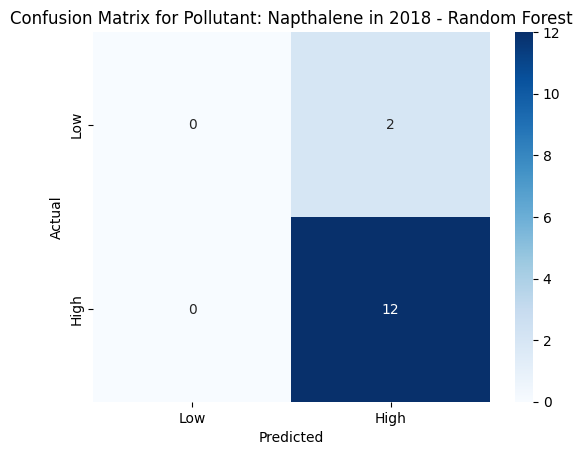


Classification Report for Pollutant: Napthalene in 2018 - Random Forest:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.00      0.00      0.00         2
High Cancer Rate       0.86      1.00      0.92        12

        accuracy                           0.86        14
       macro avg       0.43      0.50      0.46        14
    weighted avg       0.73      0.86      0.79        14



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


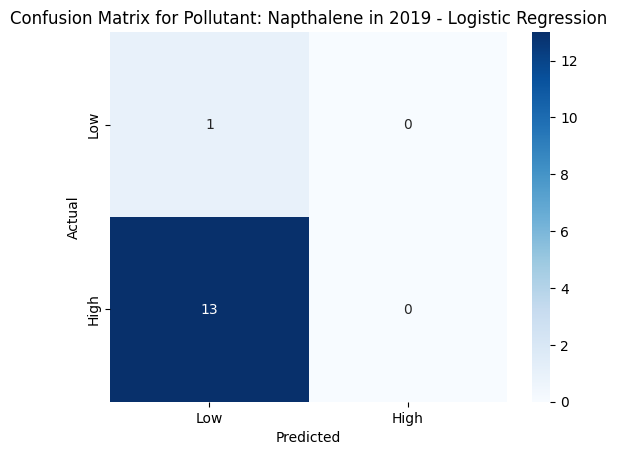


Classification Report for Pollutant: Napthalene in 2019 - Logistic Regression:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.07      1.00      0.13         1
High Cancer Rate       0.00      0.00      0.00        13

        accuracy                           0.07        14
       macro avg       0.04      0.50      0.07        14
    weighted avg       0.01      0.07      0.01        14



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


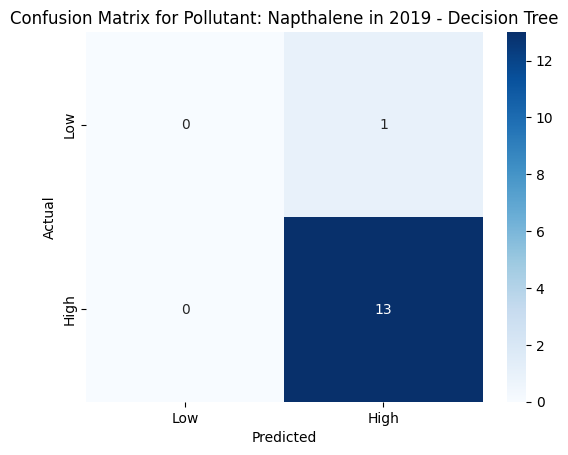


Classification Report for Pollutant: Napthalene in 2019 - Decision Tree:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.00      0.00      0.00         1
High Cancer Rate       0.93      1.00      0.96        13

        accuracy                           0.93        14
       macro avg       0.46      0.50      0.48        14
    weighted avg       0.86      0.93      0.89        14



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


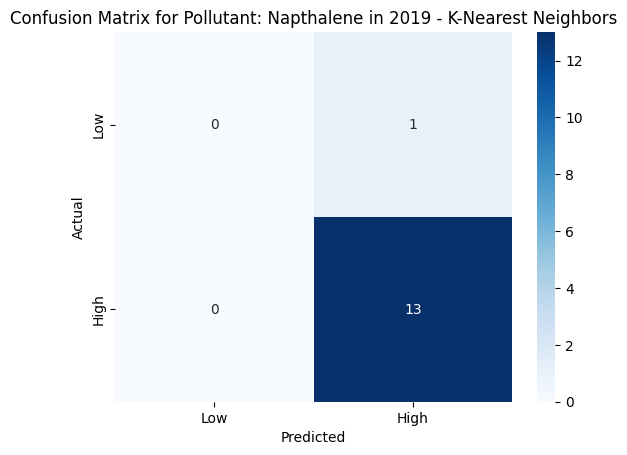


Classification Report for Pollutant: Napthalene in 2019 - K-Nearest Neighbors:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.00      0.00      0.00         1
High Cancer Rate       0.93      1.00      0.96        13

        accuracy                           0.93        14
       macro avg       0.46      0.50      0.48        14
    weighted avg       0.86      0.93      0.89        14



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


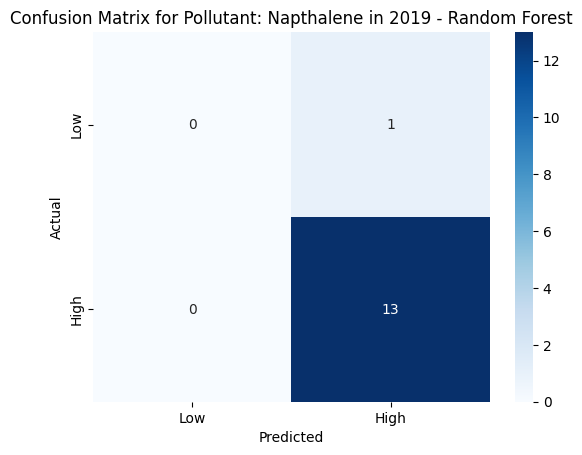


Classification Report for Pollutant: Napthalene in 2019 - Random Forest:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.00      0.00      0.00         1
High Cancer Rate       0.93      1.00      0.96        13

        accuracy                           0.93        14
       macro avg       0.46      0.50      0.48        14
    weighted avg       0.86      0.93      0.89        14



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


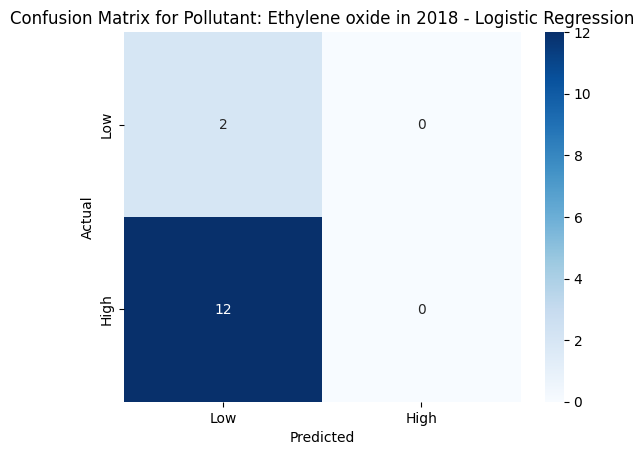


Classification Report for Pollutant: Ethylene oxide in 2018 - Logistic Regression:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.14      1.00      0.25         2
High Cancer Rate       0.00      0.00      0.00        12

        accuracy                           0.14        14
       macro avg       0.07      0.50      0.12        14
    weighted avg       0.02      0.14      0.04        14



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


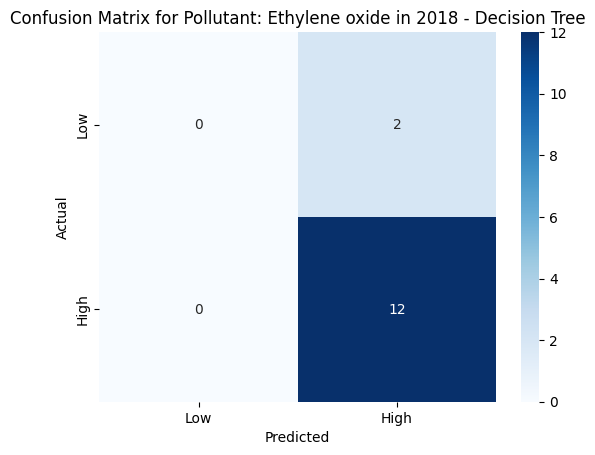


Classification Report for Pollutant: Ethylene oxide in 2018 - Decision Tree:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.00      0.00      0.00         2
High Cancer Rate       0.86      1.00      0.92        12

        accuracy                           0.86        14
       macro avg       0.43      0.50      0.46        14
    weighted avg       0.73      0.86      0.79        14



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


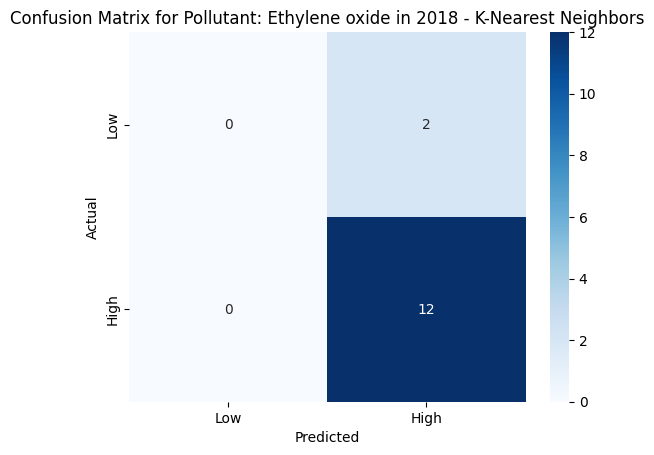


Classification Report for Pollutant: Ethylene oxide in 2018 - K-Nearest Neighbors:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.00      0.00      0.00         2
High Cancer Rate       0.86      1.00      0.92        12

        accuracy                           0.86        14
       macro avg       0.43      0.50      0.46        14
    weighted avg       0.73      0.86      0.79        14



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


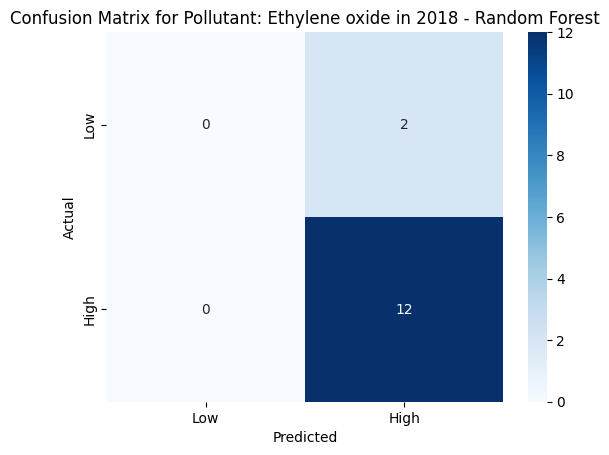


Classification Report for Pollutant: Ethylene oxide in 2018 - Random Forest:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.00      0.00      0.00         2
High Cancer Rate       0.86      1.00      0.92        12

        accuracy                           0.86        14
       macro avg       0.43      0.50      0.46        14
    weighted avg       0.73      0.86      0.79        14



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


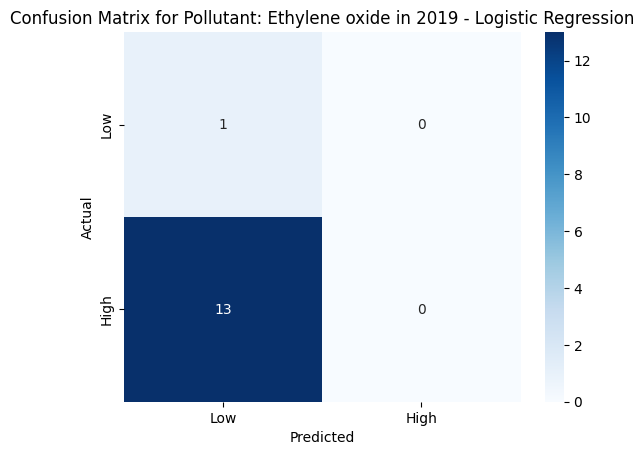


Classification Report for Pollutant: Ethylene oxide in 2019 - Logistic Regression:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.07      1.00      0.13         1
High Cancer Rate       0.00      0.00      0.00        13

        accuracy                           0.07        14
       macro avg       0.04      0.50      0.07        14
    weighted avg       0.01      0.07      0.01        14



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


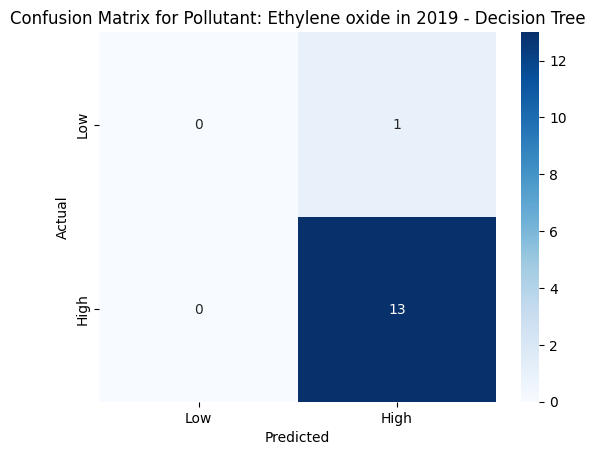

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report for Pollutant: Ethylene oxide in 2019 - Decision Tree:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.00      0.00      0.00         1
High Cancer Rate       0.93      1.00      0.96        13

        accuracy                           0.93        14
       macro avg       0.46      0.50      0.48        14
    weighted avg       0.86      0.93      0.89        14



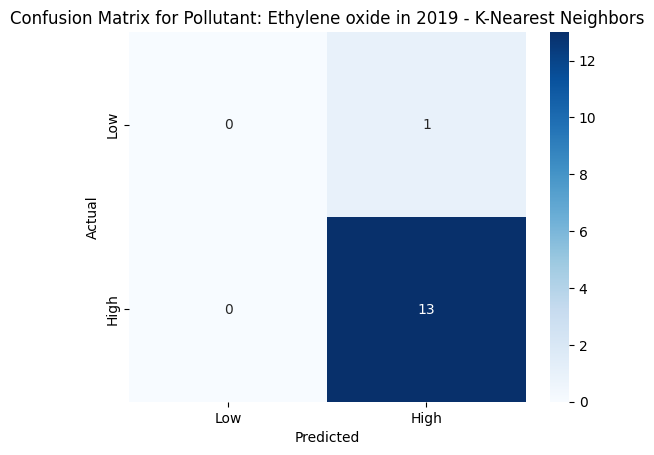


Classification Report for Pollutant: Ethylene oxide in 2019 - K-Nearest Neighbors:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.00      0.00      0.00         1
High Cancer Rate       0.93      1.00      0.96        13

        accuracy                           0.93        14
       macro avg       0.46      0.50      0.48        14
    weighted avg       0.86      0.93      0.89        14



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


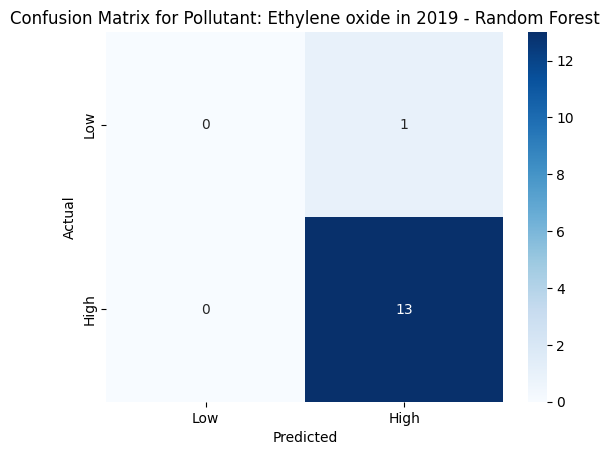


Classification Report for Pollutant: Ethylene oxide in 2019 - Random Forest:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.00      0.00      0.00         1
High Cancer Rate       0.93      1.00      0.96        13

        accuracy                           0.93        14
       macro avg       0.46      0.50      0.48        14
    weighted avg       0.86      0.93      0.89        14



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


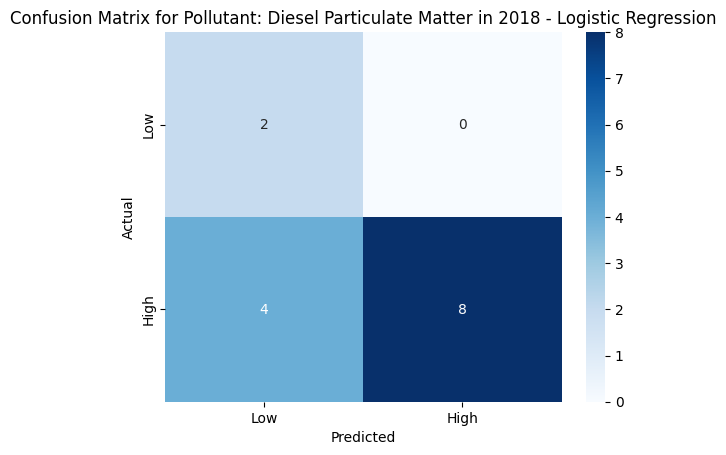


Classification Report for Pollutant: Diesel Particulate Matter in 2018 - Logistic Regression:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.33      1.00      0.50         2
High Cancer Rate       1.00      0.67      0.80        12

        accuracy                           0.71        14
       macro avg       0.67      0.83      0.65        14
    weighted avg       0.90      0.71      0.76        14



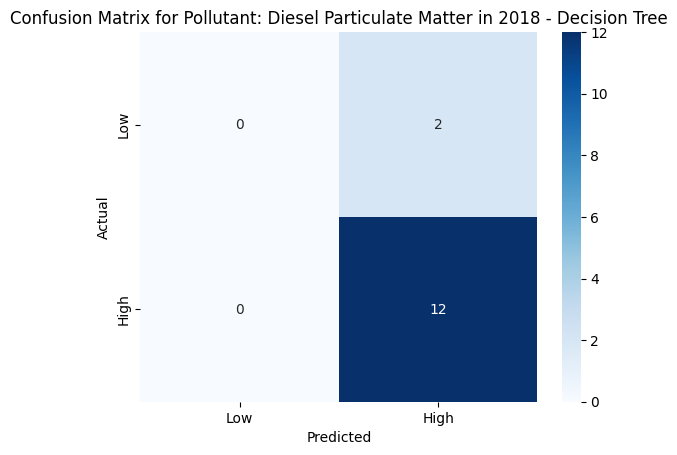


Classification Report for Pollutant: Diesel Particulate Matter in 2018 - Decision Tree:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.00      0.00      0.00         2
High Cancer Rate       0.86      1.00      0.92        12

        accuracy                           0.86        14
       macro avg       0.43      0.50      0.46        14
    weighted avg       0.73      0.86      0.79        14



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


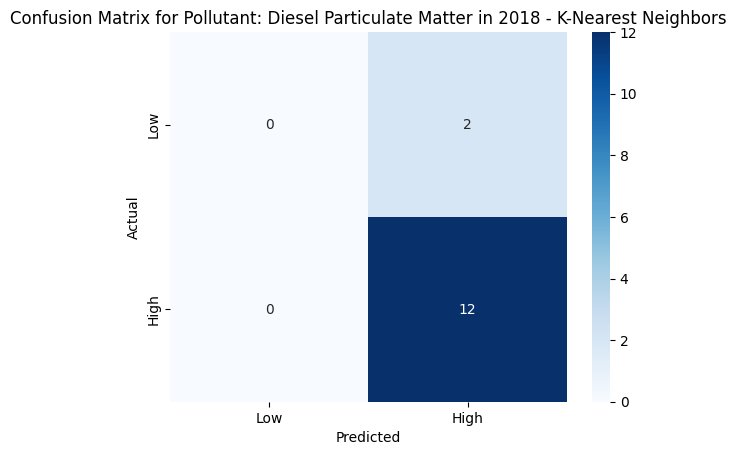


Classification Report for Pollutant: Diesel Particulate Matter in 2018 - K-Nearest Neighbors:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.00      0.00      0.00         2
High Cancer Rate       0.86      1.00      0.92        12

        accuracy                           0.86        14
       macro avg       0.43      0.50      0.46        14
    weighted avg       0.73      0.86      0.79        14



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


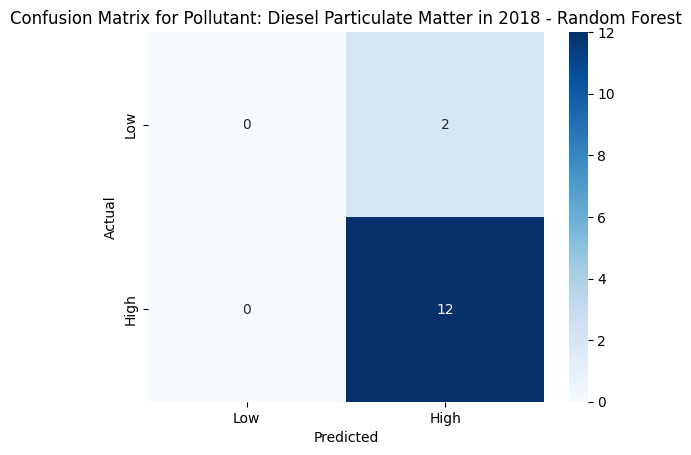


Classification Report for Pollutant: Diesel Particulate Matter in 2018 - Random Forest:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.00      0.00      0.00         2
High Cancer Rate       0.86      1.00      0.92        12

        accuracy                           0.86        14
       macro avg       0.43      0.50      0.46        14
    weighted avg       0.73      0.86      0.79        14



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


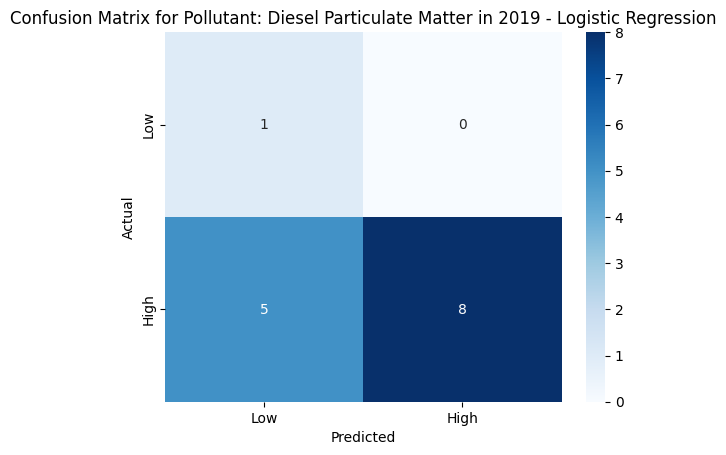


Classification Report for Pollutant: Diesel Particulate Matter in 2019 - Logistic Regression:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.17      1.00      0.29         1
High Cancer Rate       1.00      0.62      0.76        13

        accuracy                           0.64        14
       macro avg       0.58      0.81      0.52        14
    weighted avg       0.94      0.64      0.73        14



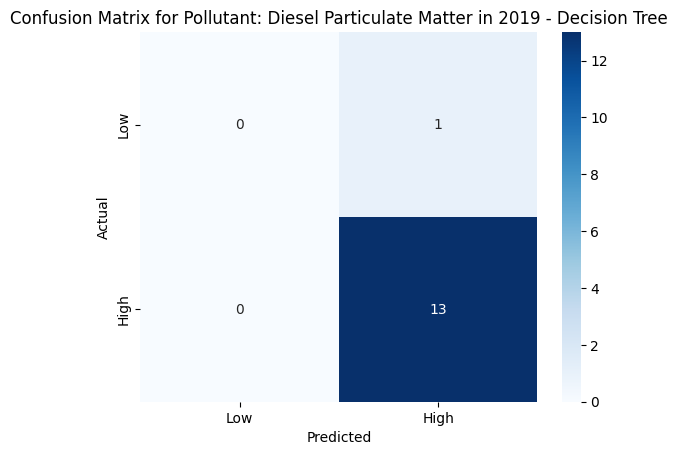


Classification Report for Pollutant: Diesel Particulate Matter in 2019 - Decision Tree:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.00      0.00      0.00         1
High Cancer Rate       0.93      1.00      0.96        13

        accuracy                           0.93        14
       macro avg       0.46      0.50      0.48        14
    weighted avg       0.86      0.93      0.89        14



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


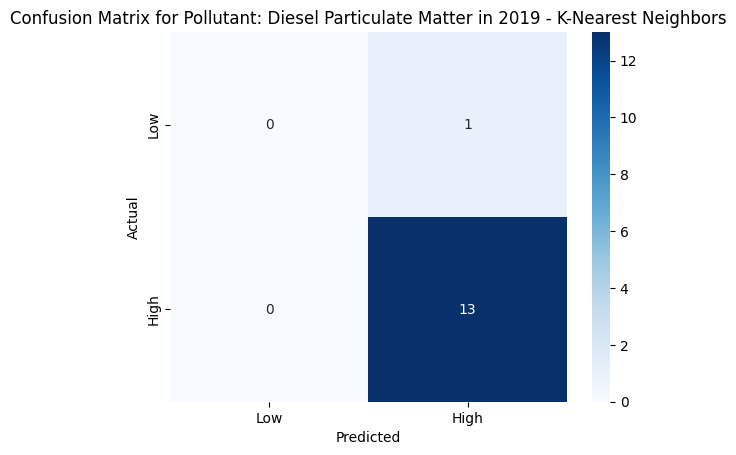


Classification Report for Pollutant: Diesel Particulate Matter in 2019 - K-Nearest Neighbors:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.00      0.00      0.00         1
High Cancer Rate       0.93      1.00      0.96        13

        accuracy                           0.93        14
       macro avg       0.46      0.50      0.48        14
    weighted avg       0.86      0.93      0.89        14



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


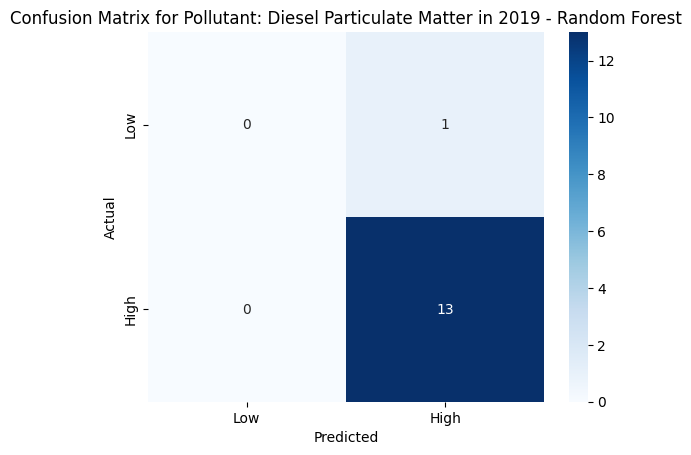


Classification Report for Pollutant: Diesel Particulate Matter in 2019 - Random Forest:
                  precision    recall  f1-score   support

 Low Cancer Rate       0.00      0.00      0.00         1
High Cancer Rate       0.93      1.00      0.96        13

        accuracy                           0.93        14
       macro avg       0.46      0.50      0.48        14
    weighted avg       0.86      0.93      0.89        14



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Classify CancerRate into "High" and "Low" categories
threshold = 6 / 100  # 6%
merged_df['CancerRateClass'] = merged_df['CancerRate'].apply(lambda x: 1 if x > threshold else 0)

# Step 2: Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(),
    # You can add more like:
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Step 3: Loop through each pollutant and year
for pollutant in merged_df['Pollutant'].unique():
    for year in merged_df['Year'].unique():
        # Filter data
        subset = merged_df[(merged_df['Pollutant'] == pollutant) & (merged_df['Year'] == year)]

        # Skip if not enough data
        if subset.shape[0] < 10:
            print(f"Skipping {pollutant} in {year} due to insufficient data.\n")
            continue

        # Features and target
        X = subset[['PollutantLevel']]
        y = subset['CancerRateClass']

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Loop through classifiers
        for name, model in classifiers.items():
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            # Confusion Matrix
            cm = confusion_matrix(y_test, y_pred)
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                        xticklabels=['Low', 'High'],
                        yticklabels=['Low', 'High'])
            plt.title(f'Confusion Matrix for {pollutant} in {year} - {name}')
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.show()

            # Classification Report
            print(f"\nClassification Report for {pollutant} in {year} - {name}:")
            print(classification_report(y_test, y_pred, target_names=['Low Cancer Rate', 'High Cancer Rate']))
